In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Importing the dataset:

In [29]:
# Reading the csv file from dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
# Checking the dimension of dataset
df.shape

(614, 13)

In [34]:
# Checking the type of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [36]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [38]:
# Lets checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [40]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in some of the columns and have to replace those null values.

In [42]:
# Checking number of unique values in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [44]:
# Checking the values counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('******************************************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
******************************************
Male      489
Female    112
Name: Gender, dtype: int64
******************************************
Yes    398
No     213
Name: Married, dtype: int64
******************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
******************************************
0.0       273
2500.0      5
2083.0      5
1

In [45]:
#The above are list of values counts present in each columns. The column Loan_ID given to the applications. It has no significane in the prediction. Let's drop this column.

In [46]:
# Removing unwanted column
df.drop("Loan_ID",axis=1,inplace=True)

In [47]:
# Checking null values in the dataframe
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

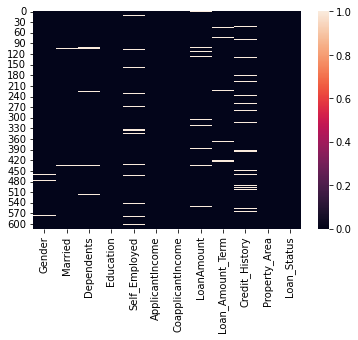

In [50]:
# Visualize null values
sns.heatmap(df.isnull())

In [57]:
# Replacing NaN values in numerical columns
df["LoanAmounnt"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [59]:
# Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Dependents"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [61]:
# Checking the NaN values again
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmounnt          0
dtype: int64

<AxesSubplot:>

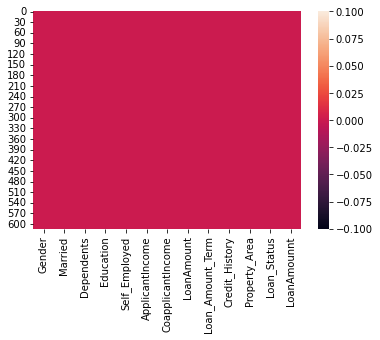

In [63]:
# Let's check again visualize the null values clearly
sns.heatmap(df.isnull())

In [65]:
# Checking uniqueness of primary_fuel
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [67]:
# Checking the list of counts in target columns
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [69]:
# CHecking whether the dataset contains any space
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt


In [71]:
# Checking description of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmounnt
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,145.465798
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,84.180967
min,150.000000,0.000000,9.000000,12.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,100.250000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,125.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,164.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,700.000000


Y    422
N    192
Name: Loan_Status, dtype: int64


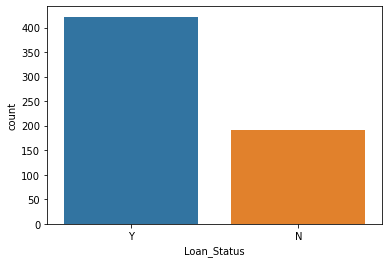

In [74]:
#Visualizing the loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


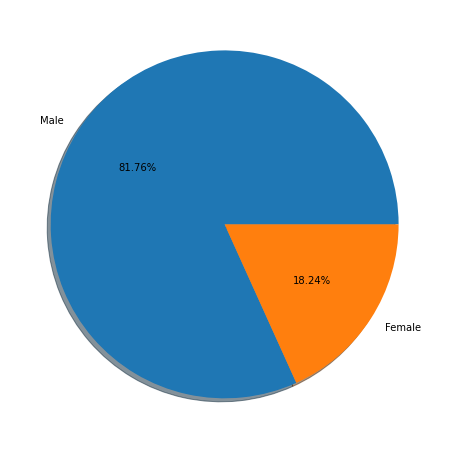

In [76]:
#Visualize the count of applicants Gender
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

0     345
1     102
2     101
3+     51
No     15
Name: Dependents, dtype: int64


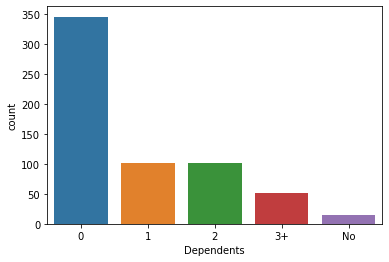

In [78]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


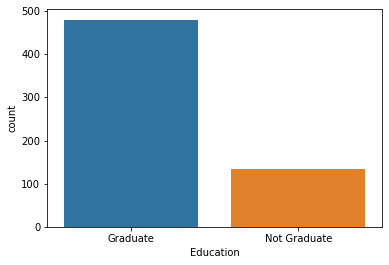

In [80]:
# Visualizing the count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


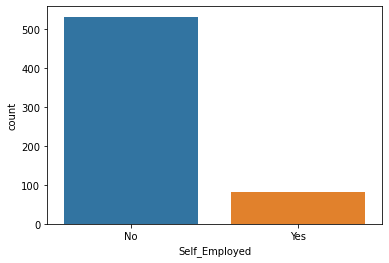

In [82]:
# Visualizing the count of Self_Employed applicants
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


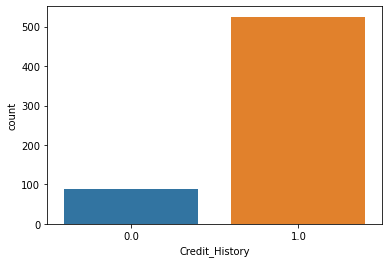

In [84]:
# Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

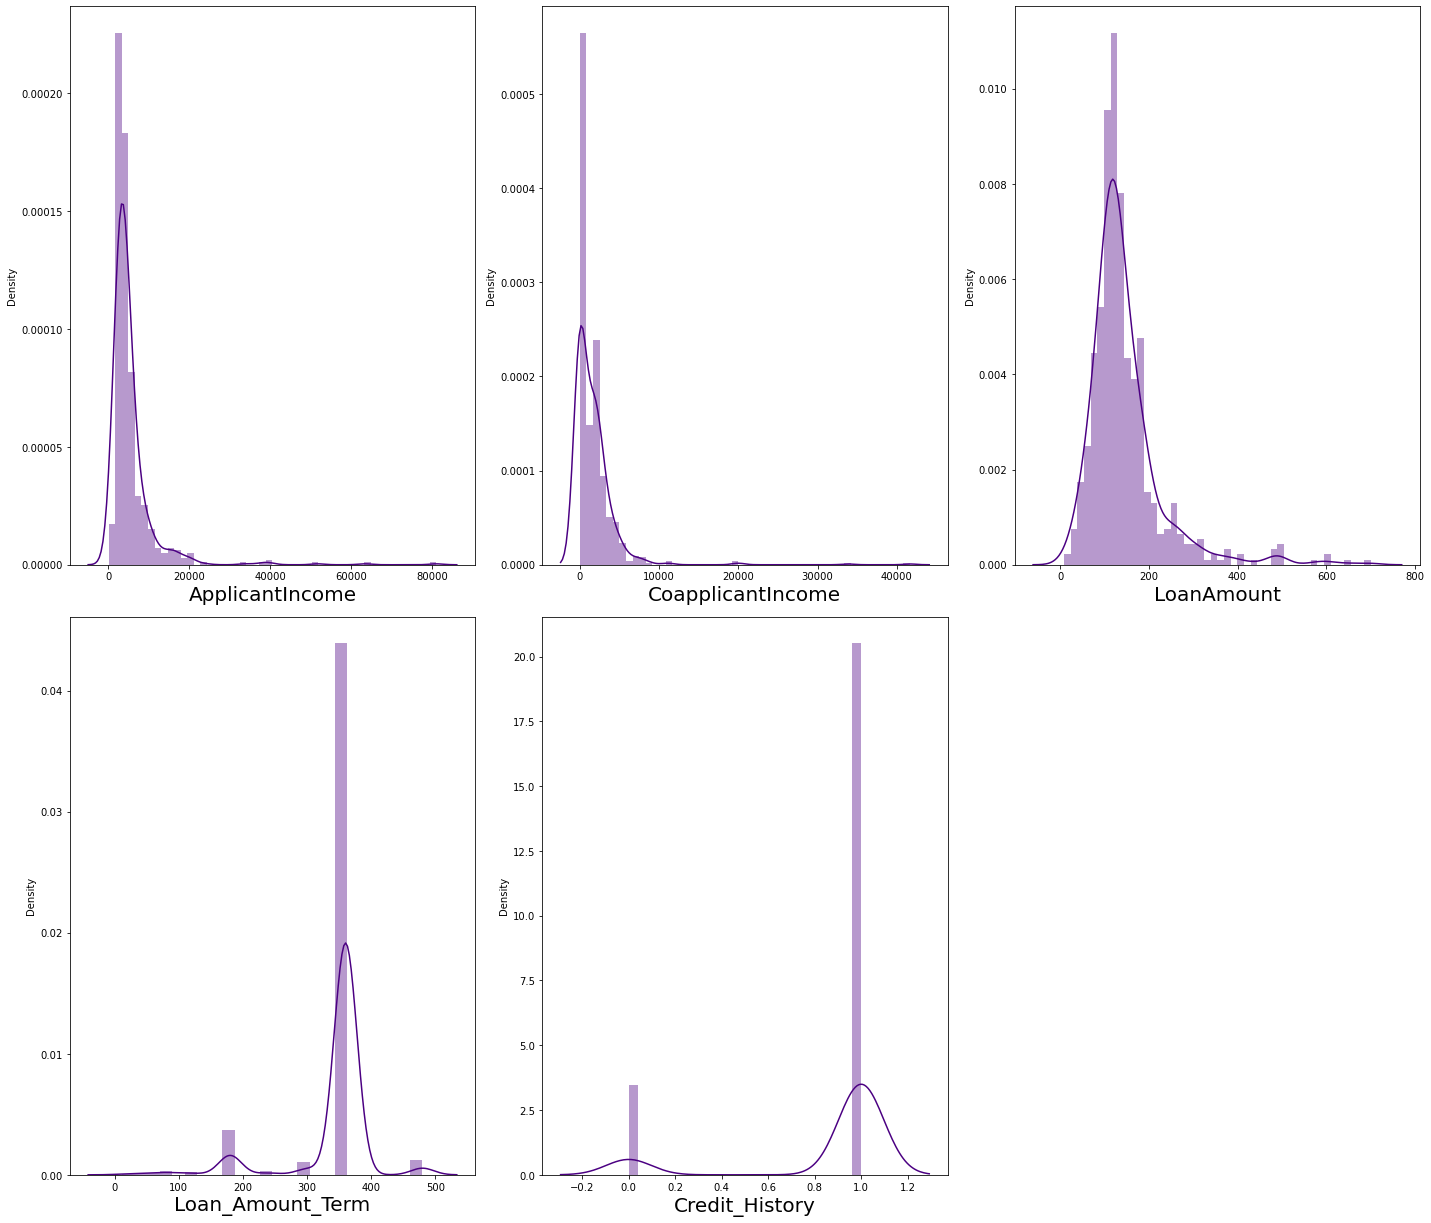

In [87]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

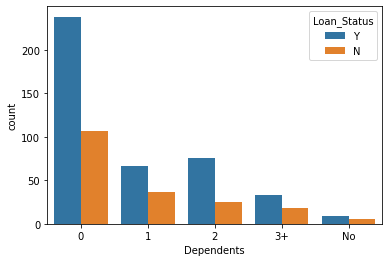

In [90]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


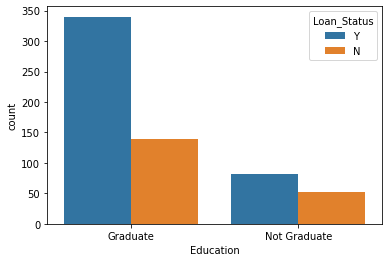

In [93]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


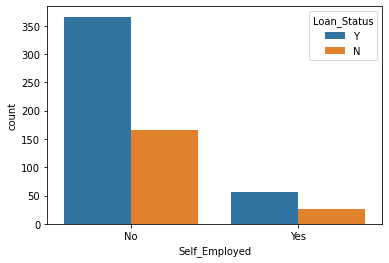

In [95]:
#Visualizing whether the applicants are Self_Employed or not 
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


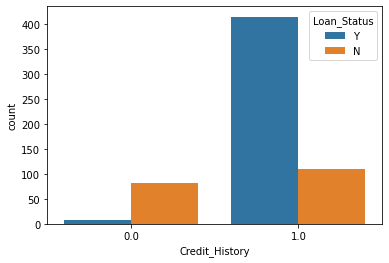

In [97]:
#Visualizing the count of the Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


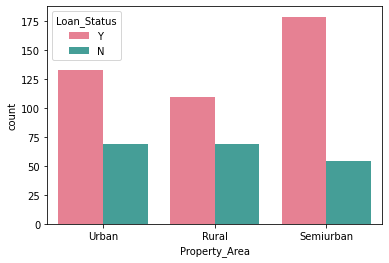

In [98]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


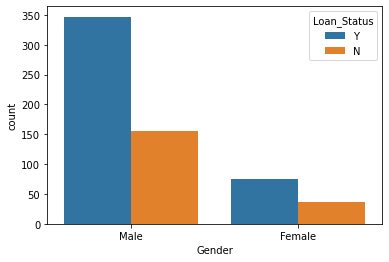

In [100]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

Yes    398
No     213
0        3
Name: Married, dtype: int64


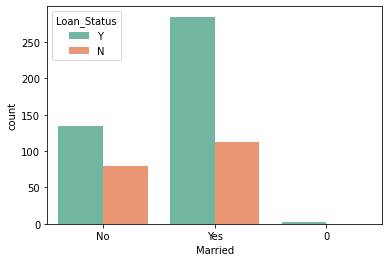

In [102]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()

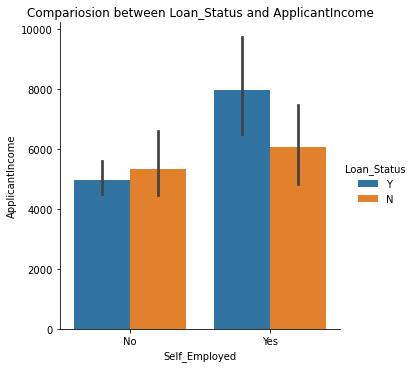

In [104]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status')
plt.title("Compariosion between Loan_Status and ApplicantIncome")
plt.show()

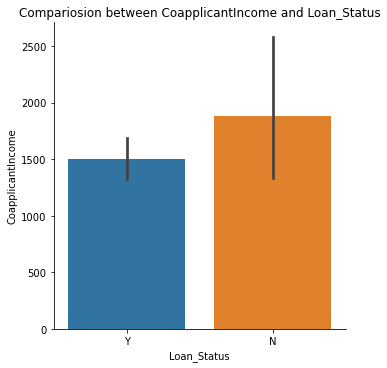

In [106]:
# Checking relation between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind="bar")
plt.title("Compariosion between CoapplicantIncome and Loan_Status")
plt.show()

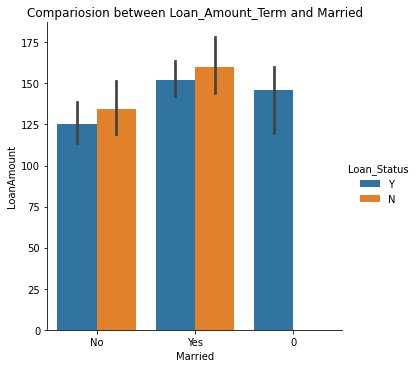

In [110]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Loan_Amount_Term and Married")
plt.show()

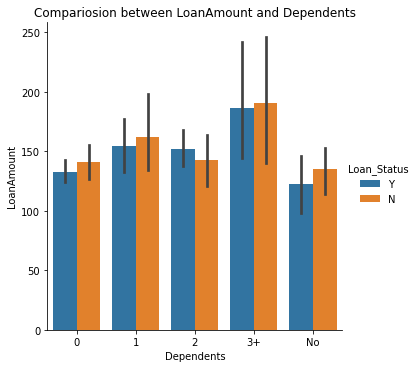

In [111]:
# Checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between LoanAmount and Dependents")
plt.show()

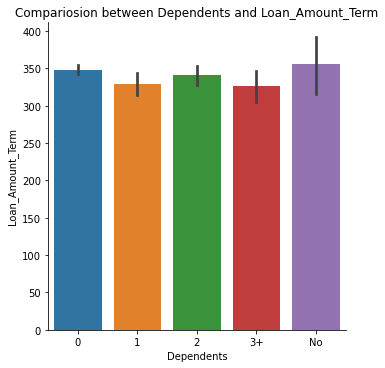

In [113]:
# Checking relation between Loan_Amount_Term and Dependents
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Compariosion between Dependents and Loan_Amount_Term")
plt.show()

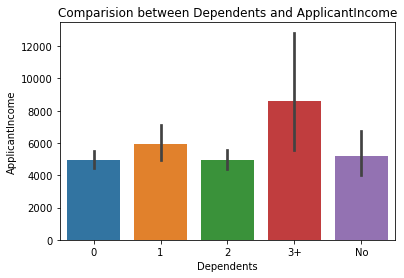

In [115]:
# let's check the applicant income as per Dependents
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

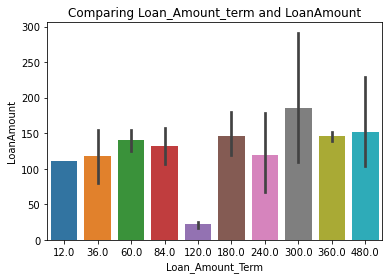

In [117]:
#Comparing Loan_Amount_term and LoanAmount
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

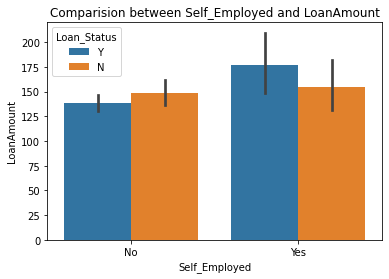

In [119]:
# let's compare the loan amount with self employed
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

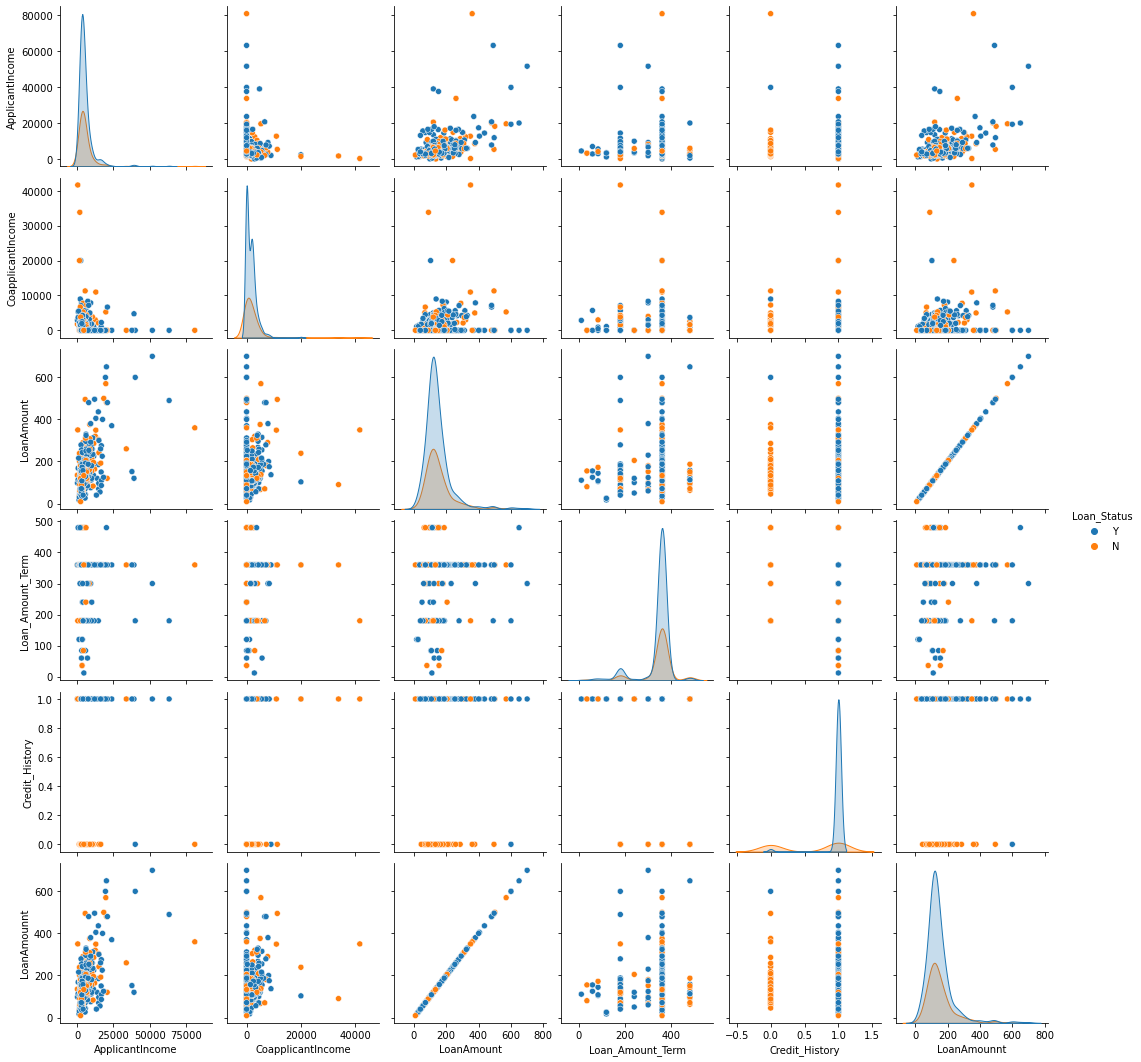

In [122]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

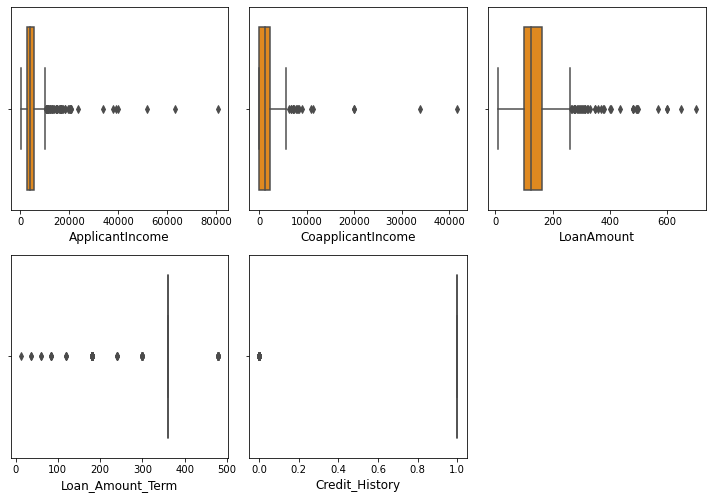

In [124]:
#Identifying the outliers:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [126]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmounnt'],
      dtype='object')

In [128]:
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.302759,0.273231
1,0.134412,0.038732,0.207648,0.273231
2,0.393747,0.554487,0.944757,0.273231
3,0.462062,0.251980,0.302759,0.273231
4,0.097728,0.554487,0.053093,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.885313,0.273231
610,0.212557,0.554487,1.253868,2.522836
611,0.437174,0.472404,1.278459,0.273231
612,0.357064,0.554487,0.493794,0.273231


In [134]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,120.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,71.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,40.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,253.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,187.0


In [136]:
# Shape of original dataset
df.shape

(614, 13)

In [138]:
# Shape of new dataframe
new_df.shape

(577, 13)

In [140]:
# Checking the the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

In [143]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [144]:
df1.shape

(459, 13)

In [146]:
# Let's check the dataloss
data_loss = (614-459)/614*100
data_loss

25.2442996742671

In [149]:
# Checking the skewness
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmounnt          1.163426
dtype: float64

In [152]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [153]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,-0.145633
1,0.234783,0.744117,0.008621
2,-0.527201,-1.122446,-1.432788
3,-0.791972,0.895786,-0.145633
4,0.728848,-1.122446,0.245833


In [154]:
# Checking skewness after using yeo-johnson ethod
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmounnt          1.163426
dtype: float64

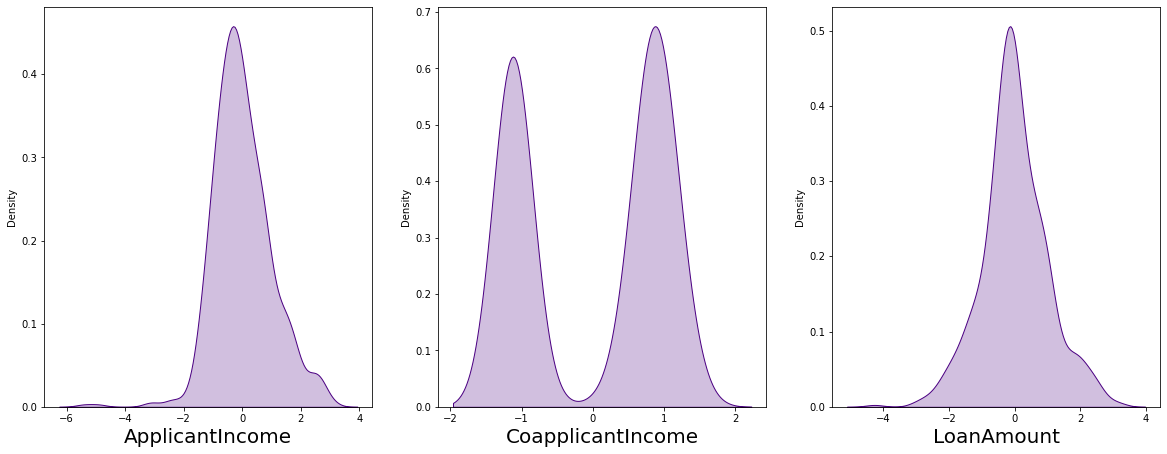

In [155]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [158]:
#Encoding the categorical columns using Label Encoding:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [159]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [161]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,1,0,0,0,2,1
1,1,2,1,0,0,0,0
2,1,2,0,0,1,2,1
3,1,2,0,1,0,2,1
4,1,1,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,1,0,0,0,0,1
610,1,2,3,0,0,0,1
611,1,2,1,0,0,2,1
612,1,2,2,0,0,2,1


In [164]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
Gender,1.000000,0.376361,0.164239,0.045696,-0.006207,0.058590,0.234551,0.171487,-0.104983,0.013172,-0.026340,0.017408,0.157574
Married,0.376361,1.000000,0.241290,0.035598,-0.007271,-0.037514,0.338528,0.169706,-0.128644,0.009897,0.002186,0.072306,0.155069
Dependents,0.164239,0.241290,1.000000,0.071052,0.041618,0.119716,-0.015377,0.111241,-0.063578,-0.066324,0.037760,-0.002160,0.107766
Education,0.045696,0.035598,0.071052,1.000000,-0.007139,-0.176074,0.049739,-0.129539,-0.090523,-0.075217,-0.068596,-0.092658,-0.150388
Self_Employed,-0.006207,-0.007271,0.041618,-0.007139,1.000000,0.212260,-0.087338,0.116899,-0.032914,-0.016390,-0.028253,-0.026525,0.121270
ApplicantIncome,0.058590,-0.037514,0.119716,-0.176074,0.212260,1.000000,-0.360946,0.430640,-0.069429,0.028825,-0.011364,-0.002484,0.454343
CoapplicantIncome,0.234551,0.338528,-0.015377,0.049739,-0.087338,-0.360946,1.000000,0.201567,0.000951,0.006564,-0.074476,0.079344,0.176641
LoanAmount,0.171487,0.169706,0.111241,-0.129539,0.116899,0.430640,0.201567,1.000000,0.050277,-0.003309,-0.099771,-0.021065,0.974360
Loan_Amount_Term,-0.104983,-0.128644,-0.063578,-0.090523,-0.032914,-0.069429,0.000951,0.050277,1.000000,0.027392,-0.057004,-0.020291,0.040686
Credit_History,0.013172,0.009897,-0.066324,-0.075217,-0.016390,0.028825,0.006564,-0.003309,0.027392,1.000000,-0.008121,0.560936,0.010184


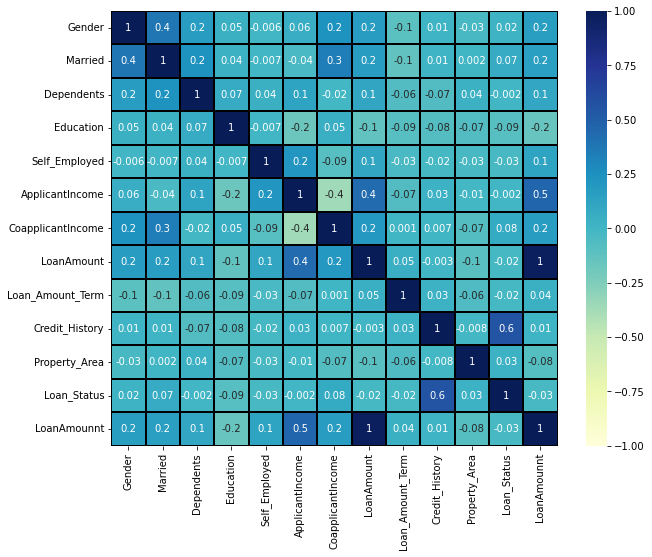

In [166]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [168]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
CoapplicantIncome    0.079344
Married              0.072306
Property_Area        0.026507
Gender               0.017408
Dependents          -0.002160
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.021065
Self_Employed       -0.026525
LoanAmounnt         -0.027909
Education           -0.092658
Name: Loan_Status, dtype: float64

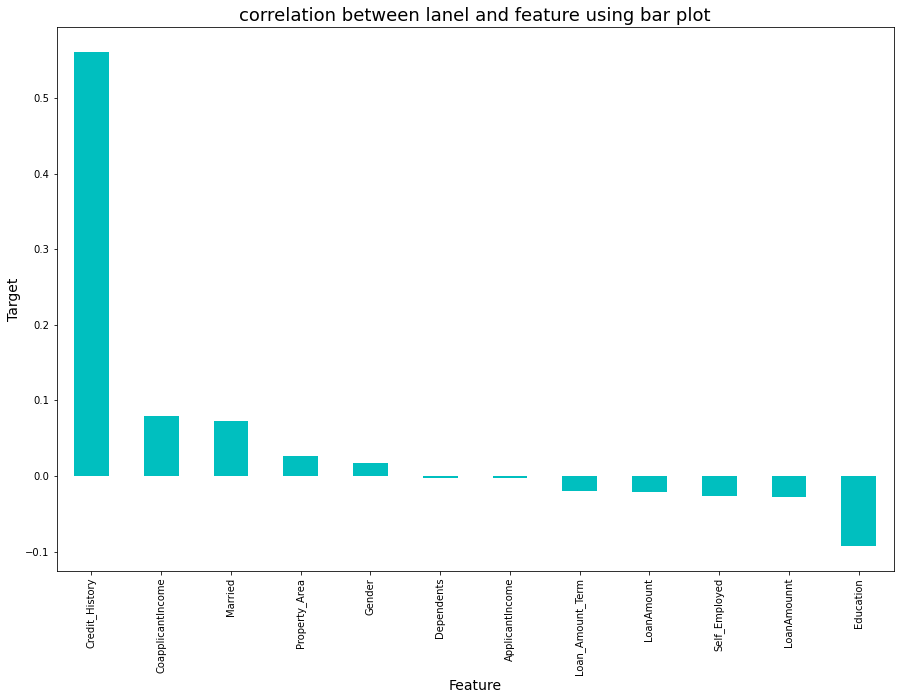

In [171]:
#Visualizing the correlation between label and features using bar plot:
plt.figure(figsize=(15,10))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [173]:
#Separating the features and label variables into x and y:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [176]:
# Dimension of x
x.shape

(577, 12)

In [177]:
# Dimension of y
y.shape

(577,)

In [179]:
#Feature Scaling using Standard Scalarization:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmounnt
0,0.477137,-1.302871,-0.737994,-0.541961,-0.380580,0.681780,-1.122446,-0.145633,0.230853,0.418513,1.227472,-0.267707
1,0.477137,0.734409,0.158475,-0.541961,-0.380580,0.234783,0.744117,0.008621,0.230853,0.418513,-1.306522,-0.125325
2,0.477137,0.734409,-0.737994,-0.541961,2.627567,-0.527201,-1.122446,-1.432788,0.230853,0.418513,1.227472,-1.228788
3,0.477137,0.734409,-0.737994,1.845150,-0.380580,-0.791972,0.895786,-0.145633,0.230853,0.418513,1.227472,-0.267707
4,0.477137,-1.302871,-0.737994,-0.541961,-0.380580,0.728848,-1.122446,0.245833,0.230853,0.418513,1.227472,0.106046
...,...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.302871,-0.737994,-0.541961,-0.380580,-0.587375,-1.122446,-1.288499,0.230853,0.418513,-1.306522,-1.139799
573,0.477137,0.734409,1.951412,-0.541961,-0.380580,0.035386,-1.122446,-2.335137,-3.243986,0.418513,-1.306522,-1.691530
574,0.477137,0.734409,0.158475,-0.541961,-0.380580,1.281658,0.173344,1.845431,0.230853,0.418513,1.227472,2.099399
575,0.477137,0.734409,1.054943,-0.541961,-0.380580,1.164426,-1.122446,0.981439,0.230853,0.418513,1.227472,0.924745


In [181]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [184]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [186]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [187]:
# Checking the value counts again
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [189]:
# DataFrame after preprocessing and data cleaning
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
0,1,1,0,0,0,0.681780,-1.122446,-0.145633,360.0,1.0,2,1,120.0
1,1,2,1,0,0,0.234783,0.744117,0.008621,360.0,1.0,0,0,128.0
2,1,2,0,0,1,-0.527201,-1.122446,-1.432788,360.0,1.0,2,1,66.0
3,1,2,0,1,0,-0.791972,0.895786,-0.145633,360.0,1.0,2,1,120.0
4,1,1,0,0,0,0.728848,-1.122446,0.245833,360.0,1.0,2,1,141.0


In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.899581589958159  on Random_state  86


In [193]:
#Creating train_test split:

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [199]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7782426778242678
[[87 16]
 [37 99]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.77       103
           1       0.86      0.73      0.79       136

    accuracy                           0.78       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.78      0.78       239



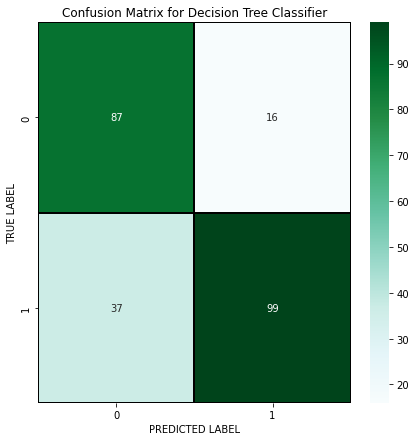

In [201]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [204]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8702928870292888
[[ 86  17]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       103
           1       0.88      0.90      0.89       136

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



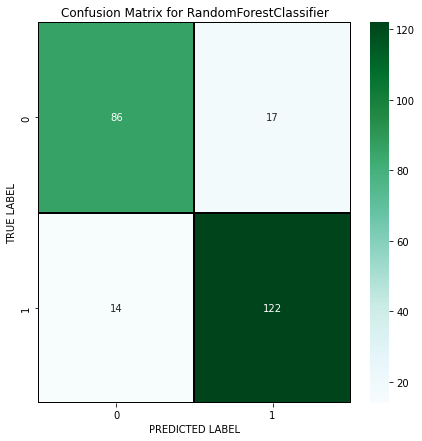

In [206]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [209]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7782426778242678
[[ 68  35]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       103
           1       0.77      0.87      0.82       136

    accuracy                           0.78       239
   macro avg       0.78      0.76      0.77       239
weighted avg       0.78      0.78      0.77       239



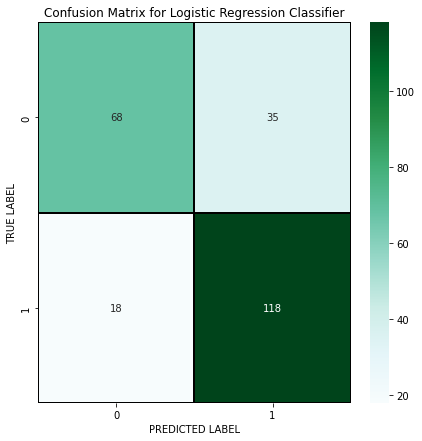

In [211]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [214]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.799163179916318
[[ 74  29]
 [ 19 117]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       103
           1       0.80      0.86      0.83       136

    accuracy                           0.80       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.80      0.80       239



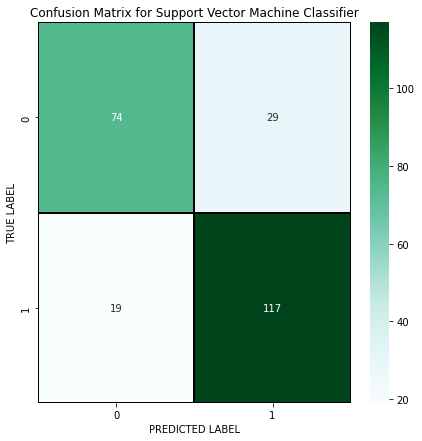

In [215]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [218]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7866108786610879
[[ 84  19]
 [ 32 104]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       103
           1       0.85      0.76      0.80       136

    accuracy                           0.79       239
   macro avg       0.78      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



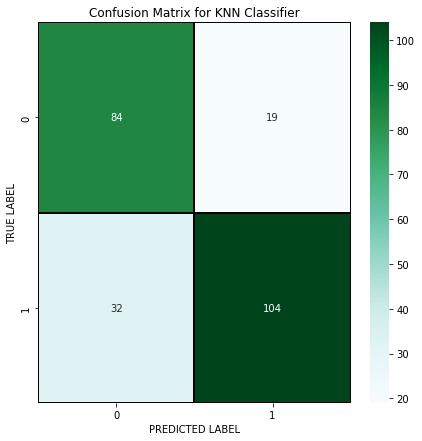

In [220]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [224]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8200836820083682
[[ 77  26]
 [ 17 119]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       103
           1       0.82      0.88      0.85       136

    accuracy                           0.82       239
   macro avg       0.82      0.81      0.81       239
weighted avg       0.82      0.82      0.82       239



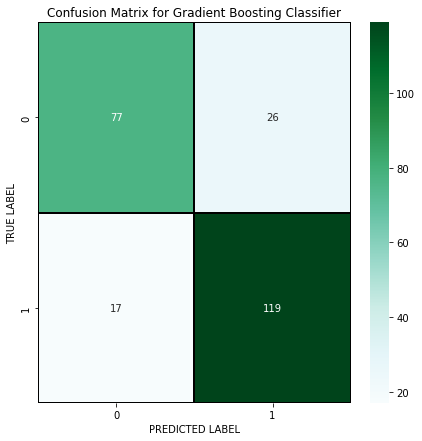

In [226]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [231]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.803347280334728
[[ 77  26]
 [ 21 115]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       103
           1       0.82      0.85      0.83       136

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



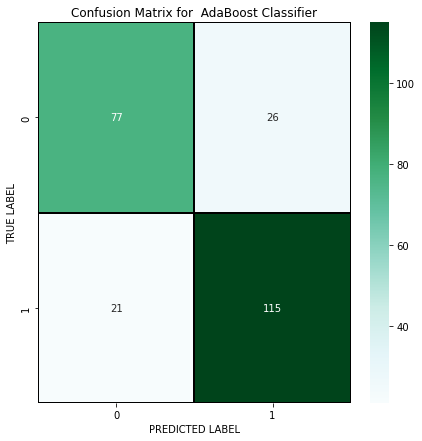

In [233]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [236]:
# Checking accuracy for GaussianNB Classifier
NB = GaussianNB()
NB.fit(x_train,y_train)

# Prediction
predNB = NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.799163179916318
[[ 56  47]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       103
           1       0.74      0.99      0.85       136

    accuracy                           0.80       239
   macro avg       0.86      0.77      0.77       239
weighted avg       0.85      0.80      0.78       239



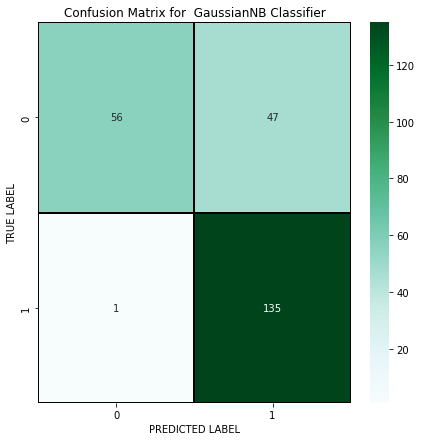

In [238]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

In [241]:
from sklearn.model_selection import cross_val_score

In [242]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7726808176100628


In [243]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8354638364779875


In [244]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7274056603773584


In [245]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7575471698113208


In [246]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7638286163522012


In [247]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.7739937106918239


In [248]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.7425471698113209


In [249]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB,x,y,cv=5).mean())

0.727437106918239


In [252]:
#Hyper Parameter Tuning:

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
# KNeighbors Classifier

parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [275]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [276]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [277]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

In [280]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train, y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.10041841004184


In [ ]:
The accuracy of best model is 84% which is very good.

In [287]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

In [289]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Loan_Application_Status.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [291]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
234,0,0
235,1,1
236,0,0
237,1,1
